In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
ROOT = os.path.join("/home", "niche", "COLO")
DIR_V8 = os.path.join("/projects", "niche_squad", "yolov8")
DIR_V9 = os.path.join(ROOT, "yolov9", "out")
RUNS = ["run_%d" % i for i in range(8)]

In [19]:
data = dict()
for k, v in zip(["v8", "v9"], [DIR_V8, DIR_V9]):  
    h = 0 if k == "v8" else None
    data[k] = pd.read_csv(os.path.join(v, RUNS[0], "results.csv"), header=h)
    for i in range(1, len(RUNS)):
        data_new = pd.read_csv(os.path.join(v, RUNS[i], "results.csv"), header=h)
        data[k] = pd.concat([data[k], data_new])

In [34]:
# set headers for v9 from v8
data["v9"].columns = data["v8"].columns
data_out = pd.concat([data["v8"], data["v9"]])
print(data_out)

In [52]:
p = 5 * 3 * 5 # n size x models x datasets
print("number of iterations in V8: %.2f" % (len(data["v8"]) / p))
p = 5 * 2 * 5 # n size x models x datasets
print("number of iterations in v9: %.2f" % (len(data["v9"]) / p))
data["v9"].query("model=='yolov9-c' and config == '1a_angle_t2s' and n == 16")

number of iterations in V8: 74.95
number of iterations in v9: 5.30


,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.255836,0.493107,0.709443,0.413258,0.522282,709,416,120,1a_angle_t2s,yolov9-c,16
0,0.247410,0.478859,0.675381,0.437236,0.530822,709,399,149,1a_angle_t2s,yolov9-c,16
0,0.210035,0.397725,0.732087,0.331453,0.456311,709,474,86,1a_angle_t2s,yolov9-c,16
0,0.184007,0.388145,0.523381,0.410437,0.460079,709,418,265,1a_angle_t2s,yolov9-c,16
0,0.245723,0.476812,0.652720,0.440056,0.525695,709,397,166,1a_angle_t2s,yolov9-c,16
0,0.182989,0.376701,0.338491,0.493653,0.401606,709,359,684,1a_angle_t2s,yolov9-c,16
0,0.188436,0.392319,0.641161,0.342736,0.446691,709,466,136,1a_angle_t2s,yolov9-c,16
0,0.163380,0.354726,0.483108,0.403385,0.439662,709,423,306,1a_angle_t2s,yolov9-c,16


<AxesSubplot: xlabel='n', ylabel='map50'>

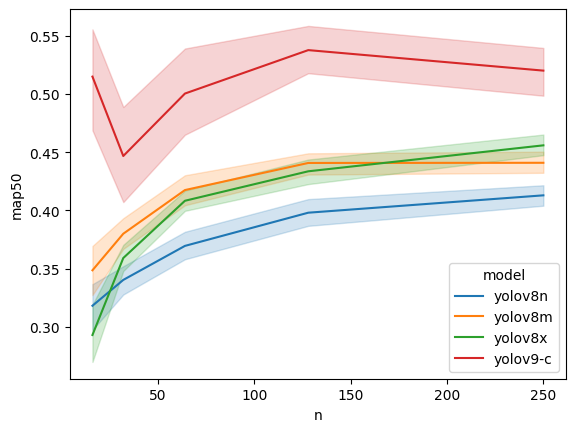

In [41]:
# config: 1a_angle_t2s, 1b_angle_s2t, 2_light
sns.lineplot(data=data_out.query("config == '3_breed'"), x="n", y="map50", hue="model",)

In [43]:
data_long = data_out.melt(id_vars=["model", "config", "n"], 
                      var_name="metric", 
                      value_name="value",)
data_long

,model,config,n,metric,value
0,yolov8n,1a_angle_t2s,16,map5095,0.1134
1,yolov8n,1a_angle_t2s,32,map5095,0.1090
2,yolov8n,1a_angle_t2s,64,map5095,0.1209
3,yolov8n,1a_angle_t2s,128,map5095,0.1445
4,yolov8n,1a_angle_t2s,256,map5095,0.1472
...,...,...,...,...,...
47083,yolov9-c,4_all,128,n_fp,116.0000
47084,yolov9-c,4_all,256,n_fp,115.0000
47085,yolov9-c,4_all,500,n_fp,106.0000
47086,yolov9-e,1a_angle_t2s,16,n_fp,124.0000


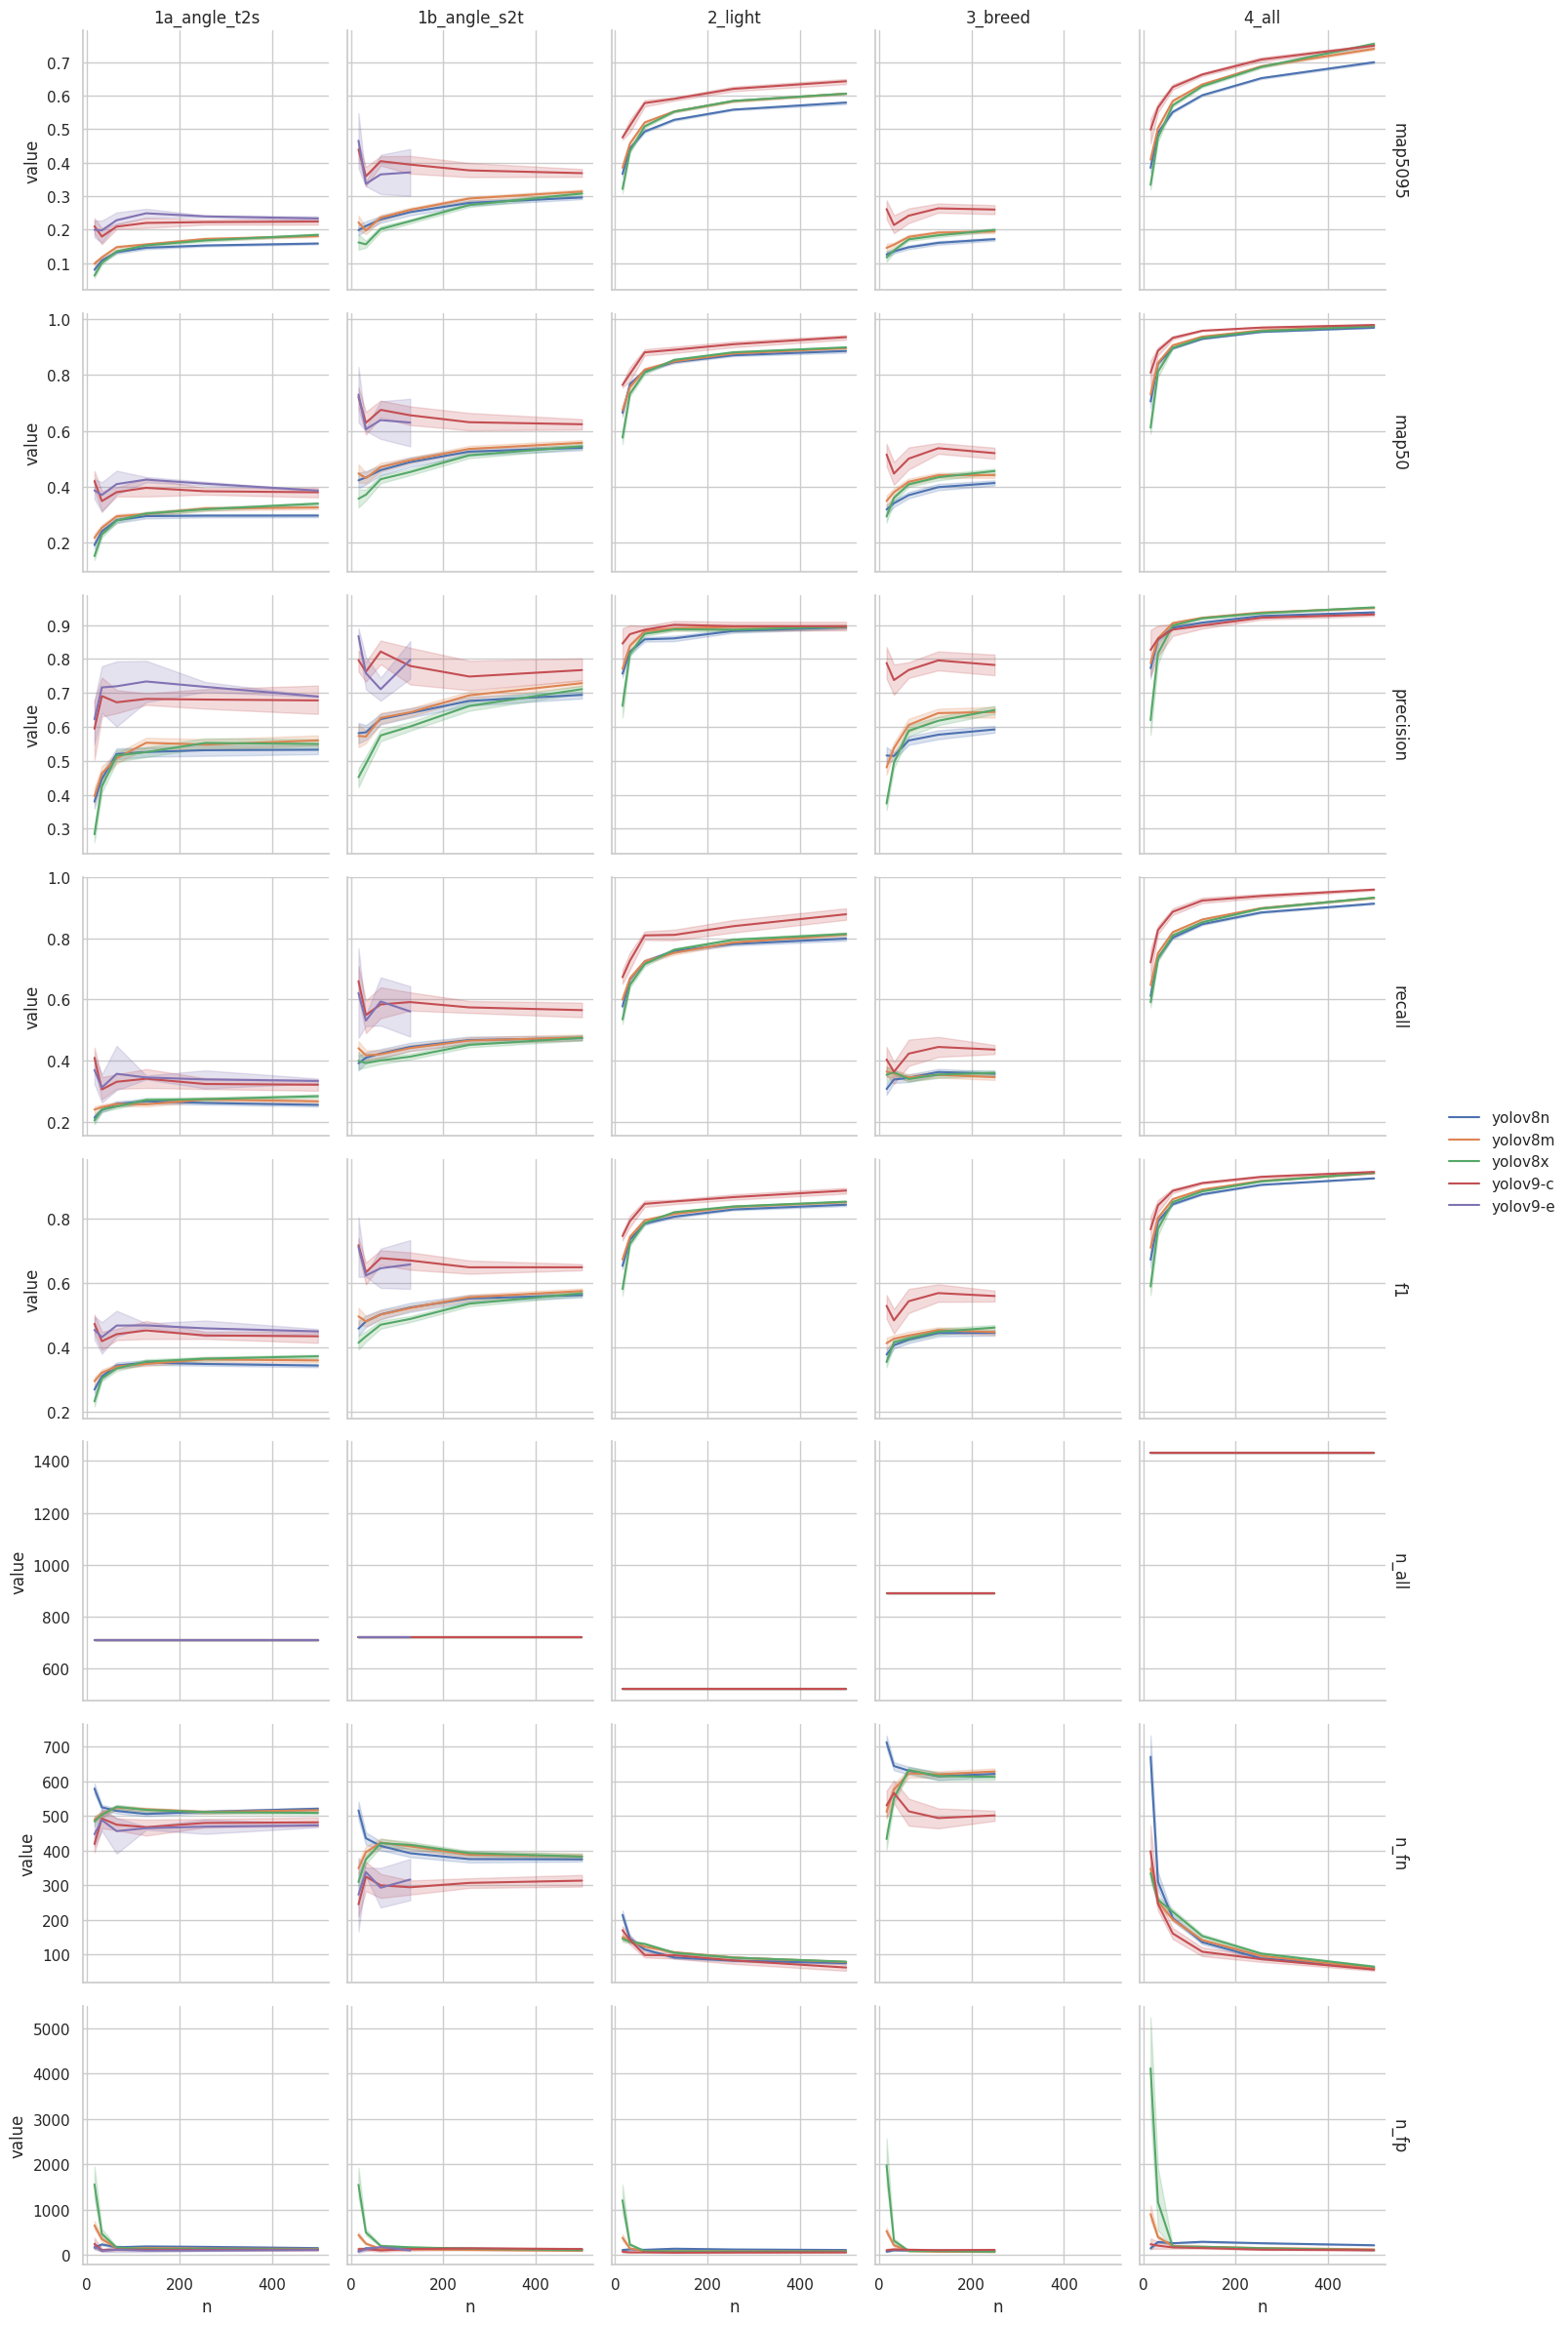

In [44]:
# x is n
# y is map50
# hue is model
# facet is config
sns.set(style="whitegrid")
g = sns.FacetGrid(data_long,
                  col="config",
                  row="metric",
                  margin_titles=True,
                  sharey='row',)
g.map(sns.lineplot, "n", "value", "model")
# g.set_axis_labels("n", "map50")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
plt.show()